# look for muons tracks reconstructed momentum - generated momentum 
from ccqe csv files

In [116]:
import sys; sys.path.insert(0, '../');
from ccqe_notebook_tools import *
from tracking_tools import *
from scipy.optimize import curve_fit
%matplotlib inline

## MCC8 - MC-BNB + extBNB overlay

In [117]:
MCC8_MCBNB_extBNB = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_GENIECC1p_MCC8_MC_BNB_extBNB.csv')
print len(MCC8_MCBNB_extBNB),'CC1p in MCC8 MC-BNB extBNB'

12976 CC1p in MCC8 MC-BNB extBNB


In [118]:
MCC8_MCBNB_extBNBIsVertexContained = MCC8_MCBNB_extBNB[MCC8_MCBNB_extBNB.IsVertexContained==True]
print len(MCC8_MCBNB_extBNBIsVertexContained),'contained',(100*float(len(MCC8_MCBNB_extBNBIsVertexContained))/len(MCC8_MCBNB_extBNB)),'%'
MCC8_MCBNB_extBNBIsMuonReconstructed = MCC8_MCBNB_extBNBIsVertexContained[MCC8_MCBNB_extBNBIsVertexContained.IsMuonReconstructed==True]
print len(MCC8_MCBNB_extBNBIsMuonReconstructed),'muon reconstructed',(100*float(len(MCC8_MCBNB_extBNBIsMuonReconstructed))/len(MCC8_MCBNB_extBNB)),'%'
MCC8_MCBNB_extBNBIsVertexReconstructed = MCC8_MCBNB_extBNBIsVertexContained[MCC8_MCBNB_extBNBIsVertexContained.IsVertexReconstructed==True]
print len(MCC8_MCBNB_extBNBIsVertexReconstructed),'tracks reconstructed',(100*float(len(MCC8_MCBNB_extBNBIsVertexReconstructed))/len(MCC8_MCBNB_extBNB)),'%'
GENIECC1p_in_FV = sample_in_FV( MCC8_MCBNB_extBNBIsVertexReconstructed )
GENIECC1p_in_FV_close_proximity = GENIECC1p_in_FV[GENIECC1p_in_FV['distance']<11]
print len(GENIECC1p_in_FV_close_proximity),'tracks reconstructed and contained with a separation distance below 11 cm',(100*float(len(GENIECC1p_in_FV_close_proximity))/len(MCC8_MCBNB_extBNB)),'%'

6365 contained 49.0520961776 %
4873 muon reconstructed 37.553945746 %
1167 tracks reconstructed 8.99352651048 %
757 tracks reconstructed and contained with a separation distance below 11 cm 5.83384710234 %


In [119]:
MCC7_MCBNB = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_GENIECC1p_MCC7_MC_BNB.csv')
print len(MCC7_MCBNB),'CC1p in MCC7 MC-BNB'

122072 CC1p in MCC7 MC-BNB


In [120]:
MCC7_MCBNBIsVertexContained = MCC7_MCBNB[MCC7_MCBNB.IsVertexContained==True]
print len(MCC7_MCBNBIsVertexContained),'contained',(100*float(len(MCC7_MCBNBIsVertexContained))/len(MCC7_MCBNB)),'%'
MCC7_MCBNBIsMuonReconstructed = MCC7_MCBNBIsVertexContained[MCC7_MCBNBIsVertexContained.IsMuonReconstructed==True]
print len(MCC7_MCBNBIsMuonReconstructed),'muon reconstructed',(100*float(len(MCC7_MCBNBIsMuonReconstructed))/len(MCC7_MCBNB)),'%'
MCC7_MCBNBIsVertexReconstructed = MCC7_MCBNBIsVertexContained[MCC7_MCBNBIsVertexContained.IsVertexReconstructed==True]
print len(MCC7_MCBNBIsVertexReconstructed),'tracks reconstructed',(100*float(len(MCC7_MCBNBIsVertexReconstructed))/len(MCC7_MCBNB)),'%'

59575 contained 48.803165345 %
42999 muon reconstructed 35.2242938594 %
11222 tracks reconstructed 9.19293531686 %


In [121]:
MCBNBextBNB = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC8_MC_BNB_extBNB.csv')
MCBNBextBNB_in_FV = sample_in_FV(MCBNBextBNB)
print len(MCBNBextBNB),'2-tracks clusters from MC-BNB events + extBNB'
print len(MCBNBextBNB_in_FV),'2-tracks clusters from MC-BNB events + extBNB in FV'
MCBNBextBNB = MCBNBextBNB_in_FV
print len(MCBNBextBNB),'2-tracks clusters from MC-BNB events + extBNB'

TrueCC1p = MCBNBextBNB[MCBNBextBNB.GENIECC1p==True]
print len(TrueCC1p), 'are true (GENIE) cc1p, ',float(100*float(len(TrueCC1p))/len(MCBNBextBNB)),'%'

CC1pDetected = MCBNBextBNB[MCBNBextBNB.Is1mu1p==True]
print len(CC1pDetected), 'are 2-tracks clusters of 1µ1p',float(100*float(len(CC1pDetected))/len(MCBNBextBNB)),'%'

NonCC1p = MCBNBextBNB[(MCBNBextBNB.Non1mu1p==True) & (MCBNBextBNB.pdg_long!=-9999) & (MCBNBextBNB.pdg_short!=-9999) ]
print len(NonCC1p), 'are 2-tracks not 1µ1p',float(100*float(len(NonCC1p))/len(MCBNBextBNB)),'%'

extPairs = MCBNBextBNB[(MCBNBextBNB.pdg_long==-9999) | (MCBNBextBNB.pdg_short==-9999)]
print len(extPairs), 'are 2-tracks with unrecognized pdg code (extBNB)',float(100*float(len(extPairs))/len(MCBNBextBNB)),'%'

print len(TrueCC1p) + len(CC1pDetected) + len(NonCC1p) + len(extPairs)

samples = [TrueCC1p , CC1pDetected, NonCC1p , extPairs]
labels = ['true CC1p' , '1$\\mu$1p non CC1p' , 'non 1$\\mu$1p' , 'cosmic data' ]
cmaps = ['Blues' , 'Greens', 'Reds' , 'Purples']
colors = ['blue' , 'green', 'red' , 'purple']

39881 2-tracks clusters from MC-BNB events + extBNB
25827 2-tracks clusters from MC-BNB events + extBNB in FV
25827 2-tracks clusters from MC-BNB events + extBNB
685 are true (GENIE) cc1p,  2.65226313548 %
2558 are 2-tracks clusters of 1µ1p 9.90436365044 %
3208 are 2-tracks not 1µ1p 12.4211096914 %
19376 are 2-tracks with unrecognized pdg code (extBNB) 75.0222635227 %
25827


In [122]:
# samples_after_cuts = [sample for sample in samples]
reduced_samples = dict()
reduced_samples['no cuts'] = [sample for sample in samples]
# cut 1 
# ------------
# cuts on PIDa
print '------------'
print 'cut 1: PIDa(µ) vs PIDa(p)'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['no cuts'],samples,labels):
    reduced = sample
    reduced = reduced[(((reduced['PIDA_assigned_muon']<-2.000000*reduced['PIDA_assigned_proton']+(22.000000))                               
                      &(reduced['PIDA_assigned_muon']<1.142857*reduced['PIDA_assigned_proton'])                     
                      &(reduced['PIDA_assigned_muon']>0))==False)]

    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 1'] = samples_after_cuts



# cut 2
# ------------
# lµ vs lp
print '------------'
print 'cut 2: l(µ) vs l(p)'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 1'],samples,labels):
    reduced=sample
    reduced=reduced[reduced['l_small_pida']>4]
    reduced=reduced[reduced['l_large_pida']<120]
    reduced=reduced[reduced['l_large_pida']>8]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 2'] = samples_after_cuts



# cut 3
# ------------
# no-collinearity: cut on angle between tracks
print '------------'
print 'cut 3: no-collinearity'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 2'],samples,labels):
    reduced = sample[np.abs(180./np.pi*sample['2_tracks_angle']-90)<60]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0),'%'
reduced_samples['cut 3'] = samples_after_cuts




# cut 4
# ------------
# Delta-Q
print '------------'
print 'cut 4: dQ_tracks/dQ_tot(u) vs dQ_tracks/dQ_tot(u)'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 3'],samples,labels):
    reduced=sample
    reduced=reduced[reduced['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_v']>-1.000000*reduced['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_u']+1.500000]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 4'] = samples_after_cuts






# cut 5
# ------------
# Delta-phi vs. theta_pq
print '------------'
print 'cut 5: Delta-phi vs. theta_pq'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 4'],samples,labels):
    reduced=sample
    reduced=reduced[np.abs(reduced['delta_phi']-180.000)<30]
    reduced=reduced[reduced['reco_CC1p_theta_pq_fromE']<25]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 5'] = samples_after_cuts

------------
cut 1: PIDa(µ) vs PIDa(p)
true CC1p retained 94.7% in this cut (649)
1$\mu$1p non CC1p retained 94.6% in this cut (2419)
non 1$\mu$1p retained 59.1% in this cut (1896)
cosmic data retained 23.0% in this cut (4463)
efficiency:94.7 , purity:6.9
------------
cut 2: l(µ) vs l(p)
true CC1p retained 77.8% in this cut (533)
1$\mu$1p non CC1p retained 72.1% in this cut (1844)
non 1$\mu$1p retained 43.9% in this cut (1409)
cosmic data retained 14.7% in this cut (2848)
efficiency:77.8 , purity:8.0
------------
cut 3: no-collinearity
true CC1p retained 74.9% in this cut (513)
1$\mu$1p non CC1p retained 65.7% in this cut (1681)
non 1$\mu$1p retained 26.2% in this cut (840)
cosmic data retained 2.8% in this cut (538)
efficiency:74.9 , purity:14.4 %
------------
cut 4: dQ_tracks/dQ_tot(u) vs dQ_tracks/dQ_tot(u)
true CC1p retained 67.2% in this cut (460)
1$\mu$1p non CC1p retained 36.9% in this cut (944)
non 1$\mu$1p retained 12.8% in this cut (412)
cosmic data retained 1.0% in this cut 

In [123]:
samples = [MCC7_MCBNBIsMuonReconstructed , MCC8_MCBNB_extBNBIsMuonReconstructed ,MCC7_MCBNBIsVertexReconstructed , MCC8_MCBNB_extBNBIsVertexReconstructed]
labels = ['MCC7 MC-BNB ($\\mu$ reconstructed)','MCC8 MC-BNB/cosmic data ($\\mu$ reconstructed)','MCC7 MC-BNB ($\\mu,p$ reconstructed)','MCC8 MC-BNB/cosmic data ($\\mu,p$ reconstructed)']

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


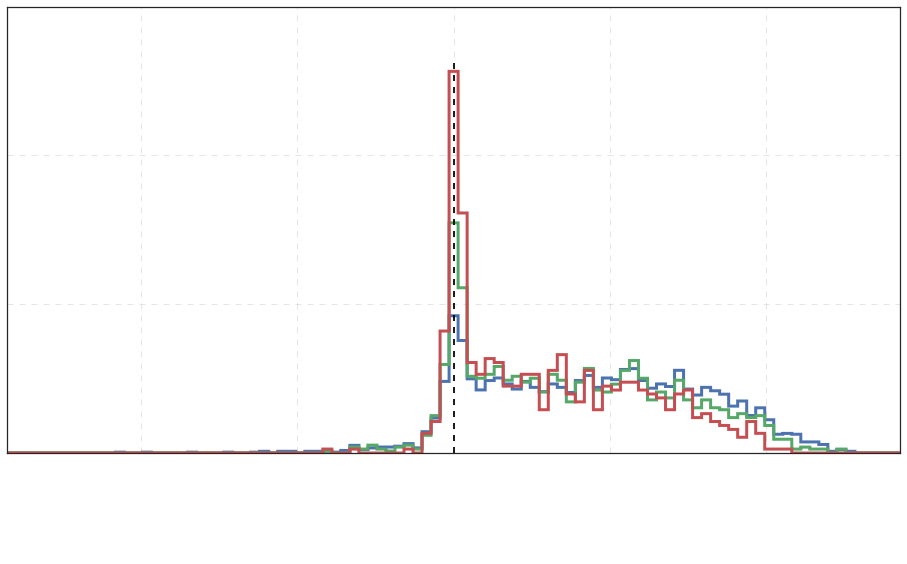

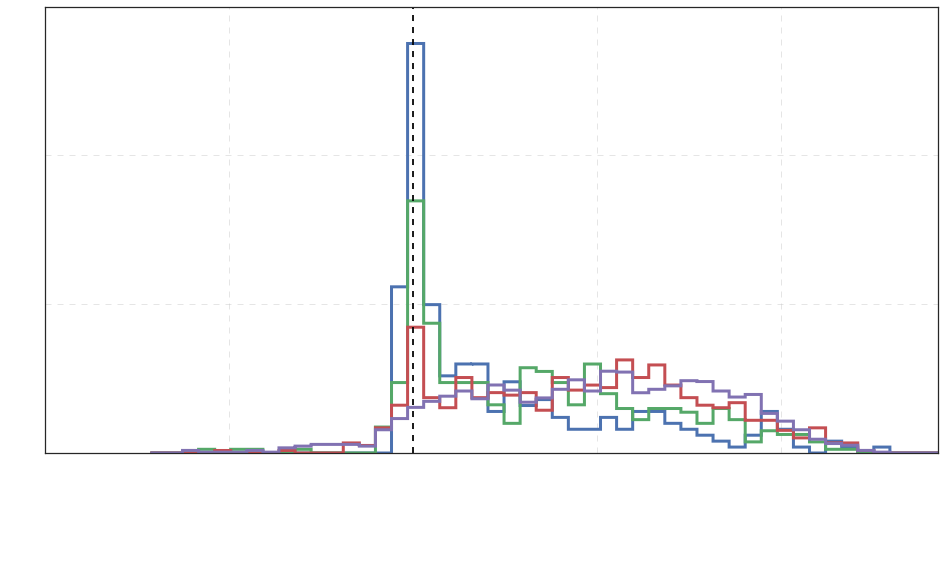

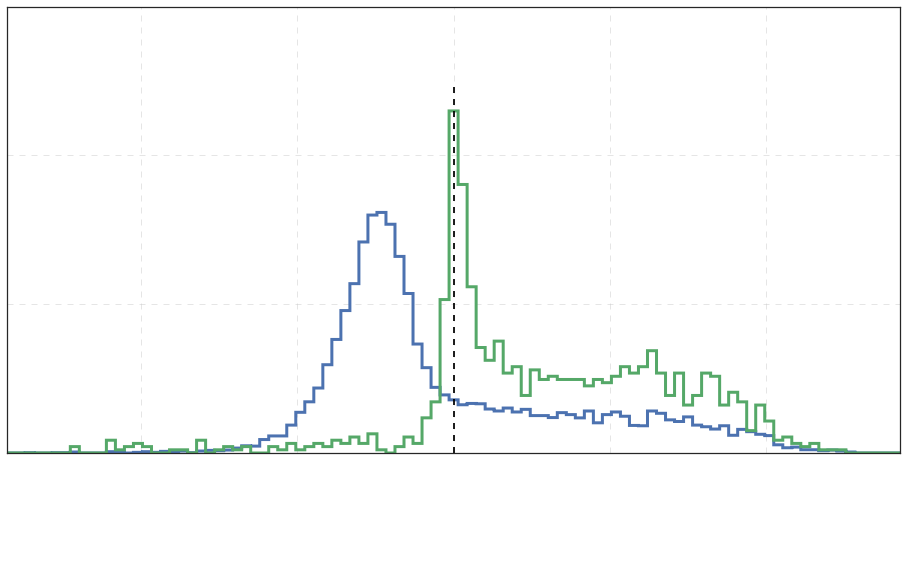

In [128]:
# before and after the cuts
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-100,100,100)
mu_p_before_cuts =  pd.concat([reduced_samples['no cuts'][0],reduced_samples['no cuts'][1]])
mu_p_after_detection_cuts =  pd.concat([reduced_samples['cut 4'][0],reduced_samples['cut 4'][1]])
mu_p_after_cuts =  pd.concat([reduced_samples['cut 5'][0],reduced_samples['cut 5'][1]])
for sample,label in zip([ mu_p_before_cuts,mu_p_after_detection_cuts, mu_p_after_cuts ]
                        ,['before selection cuts, all $\\mu$p pairs','after detection cuts, all $\\mu$p pairs','after selection cuts, all $\\mu$p pairs']):
    ratio = 100*(sample['truth_Ev'] - sample['reco_CC1p_Ev_fromE'])/sample['truth_Ev']
    plt.hist( ratio , bins=bins, label=label, histtype='step',linewidth=3,normed=1);
ax.grid(linestyle='--',alpha=0.5)
# ax.legend(loc='upper left',fontsize=20)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
# ax.annotate('gen. $E_{\\nu}$ = rec. $E_{\\nu}$', xy=(0, 0.5*np.max(ax.get_ylim())), xytext=(-55, 0.6*np.max(ax.get_ylim())) ,fontsize=20, 
#             arrowprops=dict(facecolor='black', shrink=0.05))
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='white',fontsize=45,nticklabels=4)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(ticker.NullFormatter())


# In Pt bins
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-50,100,50)
PtBins = [[0,0.1],[0.1,0.2],[0.2,1.0]]
mu_p_after_cuts =  pd.concat([reduced_samples['cut 5'][0],reduced_samples['cut 5'][1]])

for sample,label in zip([ mu_p_before_cuts[mu_p_before_cuts['reco_CC1p_Pt']<0.075]
                         ,mu_p_before_cuts[(mu_p_before_cuts['reco_CC1p_Pt']>0.075)&(mu_p_before_cuts['reco_CC1p_Pt']<0.15)] 
                         ,mu_p_before_cuts[(mu_p_before_cuts['reco_CC1p_Pt']>0.15)&(mu_p_before_cuts['reco_CC1p_Pt']<0.25)] 
                         ,mu_p_before_cuts[mu_p_before_cuts['reco_CC1p_Pt']>0.25]]
                        ,['$p_{t}<0.075$ GeV/c','$0.075<p_{t}<0.150$ GeV/c','$0.150<p_{t}<0.250$ GeV/c','$0.250$ GeV/c $<p_{t}$']):
    ratio = 100*(sample['truth_Ev'] - sample['reco_CC1p_Ev_fromE'])/sample['truth_Ev']
    plt.hist( ratio , bins=bins, label=label, histtype='step',linewidth=3,normed=1);
ax.grid(linestyle='--',alpha=0.5)
# ax.legend(loc='upper left',fontsize=30)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
# ax.annotate('gen. $E_{\\nu}$ = rec. $E_{\\nu}$', xy=(0, 0.5*np.max(ax.get_ylim())), xytext=(-55, 0.6*np.max(ax.get_ylim())) ,fontsize=20, 
#             arrowprops=dict(facecolor='black', shrink=0.05))
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='white',fontsize=45,nticklabels=4)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(ticker.NullFormatter())



MCC7_MCBNBIsVertexReconstructed['reco_CC1p_Ev_fromE'] = MCC7_MCBNBIsVertexReconstructed['reco_CC1p_Ev_fromE'] + 0.04

# no cosmic vs. with cosmic overlay
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-100,100,100)
for sample,label in zip([MCC7_MCBNBIsVertexReconstructed , MCC8_MCBNB_extBNBIsVertexReconstructed]
                        ,['MCC7 MC-BNB','MCC8 MC-BNB/cosmic data']):
    ratio = 100*(sample['truth_Ev'] - sample['reco_CC1p_Ev_fromE'])/sample['truth_Ev']
    plt.hist( ratio , bins=bins, label=label, histtype='step',linewidth=3,normed=1);
ax.grid(linestyle='--',alpha=0.5)
# ax.legend(loc='upper left',fontsize=20)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
# ax.annotate('gen. $E_{\\nu}$ = rec. $E_{\\nu}$', xy=(0, 0.5*np.max(ax.get_ylim())), xytext=(-55, 0.6*np.max(ax.get_ylim())) ,fontsize=20, 
#             arrowprops=dict(facecolor='black', shrink=0.05))
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='white',fontsize=45,nticklabels=4)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
ax.yaxis.set_major_formatter(ticker.NullFormatter())



405 4468


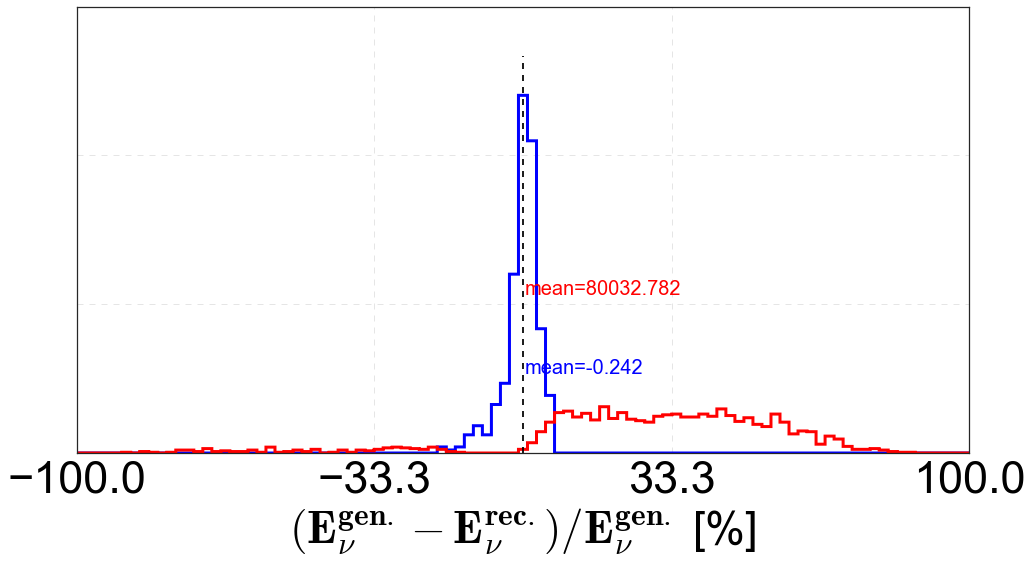

In [115]:
sample = MCC8_MCBNB_extBNBIsMuonReconstructed
peak_Ev_sample = sample[np.abs((sample['truth_Ev'] - sample['reco_CC1p_Ev_fromE'])/sample['truth_Ev']) < 0.1]
tail_Ev_sample = sample[np.abs((sample['truth_Ev'] - sample['reco_CC1p_Ev_fromE'])/sample['truth_Ev']) > 0.1]

print len(peak_Ev_sample), len(tail_Ev_sample)
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-100,100,100)
bins_x = np.linspace(-1,1,100)
for i,sample,color in zip(range(2),[peak_Ev_sample,tail_Ev_sample],['blue','red']):
    ratio = 100*(sample['truth_Ev'] - sample['reco_CC1p_Ev_fromE'] - 0.04)/sample['truth_Ev']
#     ratio = 100*(sample['truth_Pmu'] - sample['reco_CC1p_Pmu'])/sample['truth_Pmu']
#     ratio = 100*(sample['truth_Emu'] - sample['reco_CC1p_Emu'])/sample['truth_Emu']
    plt.hist( ratio , bins=bins, label=label, histtype='step',linewidth=3,normed=1, color=color);
#     x = sample['truth_Ev'] - sample['reco_CC1p_Ev_fromE'] - 0.04
#     x = sample['truth_Ev'] - sample['reco_CC1p_Ev_fromE'] 
#     x = sample['truth_Ev'] - sample['reco_CC1p_Emu'] - (sample['reco_CC1p_Ep'] -0.939)
#     x = sample['truth_Ev'] - sample['truth_Emu'] - (sample['truth_Ep'] - 0.939)
#     plt.hist( x , bins=bins_x, label=label, histtype='step',linewidth=3,normed=1, color=color);
    plt.text(0.3,0.2*(i+1)*np.max(ax.get_ylim()),'mean=%.3f'%np.mean(ratio),color=color,fontsize=20)
ax.grid(linestyle='--',alpha=0.5)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45,nticklabels=4)
# ax.xaxis.set_ticks([-70,-35,0,35,70]);
ax.yaxis.set_major_formatter(ticker.NullFormatter())

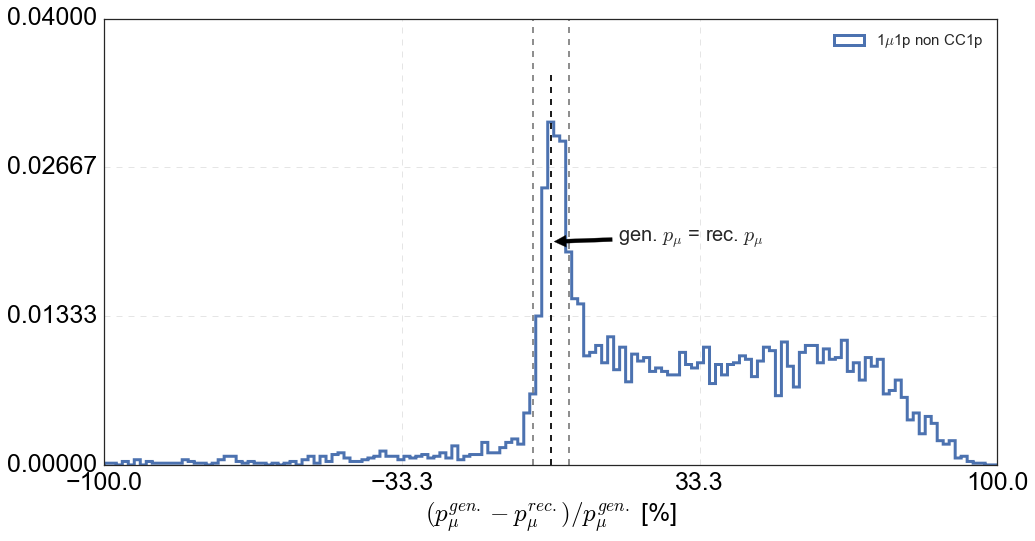

In [69]:
sample = MCC8_MCBNB_extBNBIsMuonReconstructed
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-100,100,150)
ratio = 100*(sample['truth_Pmu'] - sample['reco_CC1p_Pmu'])/sample['truth_Pmu']
plt.hist( ratio , bins=bins, label=label, histtype='step',linewidth=3,normed=1);
set_axes(ax,'$(p^{gen.}_{\\mu}-p^{rec.}_{\\mu})/p^{gen.}_{\\mu}$ [%]')
ax.grid(linestyle='--',alpha=0.5)
ax.legend(loc='best',fontsize=15)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
ax.annotate('gen. $p_{\\mu}$ = rec. $p_{\\mu}$', xy=(0, 0.5*np.max(ax.get_ylim())), xytext=(15, 0.5*np.max(ax.get_ylim())) ,fontsize=20, arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([4,4],ax.get_ylim(),'--',color='gray')
plt.plot([-4,-4],ax.get_ylim(),'--',color='gray')

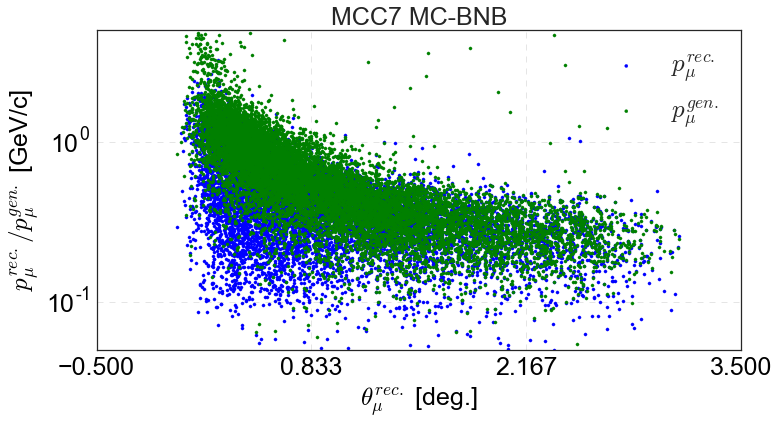

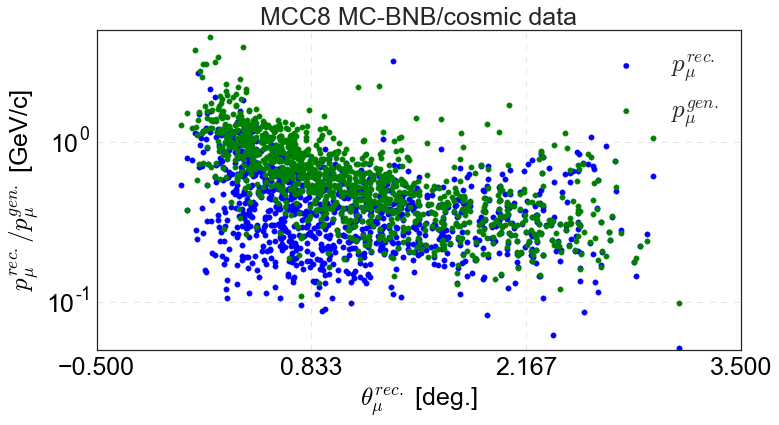

In [14]:
for sample,label,s in zip([MCC7_MCBNBIsVertexReconstructed , MCC8_MCBNB_extBNBIsVertexReconstructed]
                        ,['MCC7 MC-BNB','MCC8 MC-BNB/cosmic data']
                          ,[10,30]):
    
    fig=plt.figure(figsize=(20,6))
    
#     ax = fig.add_subplot(1,4,1)
#     ax.set_title(label,fontsize=25)
#     plot_2d_hist(sample.truth_Pmu_theta,sample.truth_Pmu,ax=ax,cmap='Greens')
#     set_axes(ax,'$\\theta^{gen.}_{\\mu}$ [deg.]','$p^{gen.}_{\\mu}$ [GeV/c]')
# ax.set_ylim(0,5)
#     ax = fig.add_subplot(1,4,2)
#     ax.set_title(label,fontsize=25)
#     plot_2d_hist(sample.reco_CC1p_Pmu_theta,sample.reco_CC1p_Pmu,ax=ax,cmap='Blues')
#     set_axes(ax,'$\\theta^{rec.}_{\\mu}$ [deg.]','$p^{rec.}_{\\mu}$ [GeV/c]')
# ax.set_ylim(0,5)
    ax = fig.add_subplot(1,4,(3,4))
    ax.set_title(label,fontsize=25)
    ax.scatter(sample.reco_CC1p_Pmu_theta,sample.reco_CC1p_Pmu,s=s,color='blue',label='$p^{rec.}_{\\mu}$')
    ax.scatter(sample.reco_CC1p_Pmu_theta,sample.truth_Pmu,s=s,color='green',label='$p^{gen.}_{\\mu}$')
    set_axes(ax,'$\\theta^{rec.}_{\\mu}$ [deg.]','$p^{rec.}_{\\mu} / p^{gen.}_{\\mu}$ [GeV/c]')
    ax.set_ylim(0.05,5)
    ax.set_yscale('log')
    ax.legend(fontsize=25)
    plt.tight_layout()
    ax.grid(linestyle='--',alpha=0.5)

In [272]:
def pow_func(x, a, b, c):
    return a*np.power(x,b) + c

def correct_momentum_from_theta(sample = MCC8_MCBNB_extBNBIsVertexReconstructed,varx = 'Pmu_theta',vary = 'Pmu',
                                corr_type = 'pow_func(x, *popt_true)',ticks_color='white',additional_sample=None):

    fig=plt.figure(figsize=(28,8))
    ax=fig.add_subplot(1,3,1)

    x = 180./np.pi*sample['reco_CC1p_'+varx]
    y_reco = sample['reco_CC1p_'+vary]
    y_true = sample['truth_'+vary]
    if additional_sample is not None:
        additional_x = 180./np.pi*additional_sample['reco_CC1p_'+varx]
        additional_y_reco = additional_sample['reco_CC1p_'+vary]
        additional_y_true = additional_sample['truth_'+vary]

    ax.scatter(x,y_reco,s=10,color='blue',label='$p^{rec.}_{\\mu}$')
    ax.scatter(x,y_true,s=10,color='green',label='$p^{gen.}_{\\mu}$')
    if additional_sample is not None:
        ax.scatter(additional_x,additional_y_reco,s=10,color='blue')
        ax.scatter(additional_x,additional_y_true,s=10,color='green')
    set_axes(ax,'$\\theta^{rec.}_{\\mu}$ [deg.]','$p^{rec.}_{\\mu} / p^{gen.}_{\\mu}$ [GeV/c]'
             ,fontsize=40,ticks_color=ticks_color)
    ax.set_ylim(0.05,5)
#     ax.set_yscale('log')
    ax.legend(fontsize=35)
    ax.grid(linestyle='--',alpha=0.5)
    ax.xaxis.set_ticks([0,45,90,135,180])
    plt.tight_layout()

    # for \theta<90, perform correction based on correlation
    x_fit = np.linspace(np.min(ax.get_xlim()), np.max(ax.get_xlim()), 100)
    popt_reco, pcov_reco = curve_fit(pow_func, x, y_reco , (1,-0.5,0), maxfev=5000)
    plt.plot(x_fit, pow_func(x_fit, *popt_reco), '--', c='blue',linewidth=3)
    popt_true, pcov_true = curve_fit(pow_func, x, y_true , (1,-0.5,0), maxfev=5000)
    plt.plot(x_fit, pow_func(x_fit, *popt_true), '--', c='green',linewidth=3)

    if corr_type == 'y_reco + pow_func(x, *popt_true) - pow_func(x, *popt_reco)':
        y_corrected = y_reco + pow_func(x, *popt_true) - pow_func(x, *popt_reco)
        print 'reco_CC1p_'+vary+'_corrected = ' + 'reco_CC1p_'+vary + " + (%f*power(%s , %f)+%f)"%(popt_true[0],'reco_CC1p_'+varx,popt_true[1],popt_true[2]) + " - (%f*power(%s , %f)+%f)"%(popt_reco[0],'reco_CC1p_'+varx,popt_reco[1],popt_reco[2]) 
    elif corr_type == 'pow_func(x, *popt_true)':
        y_corrected = pow_func(x, *popt_true)
        print 'reco_CC1p_'+vary+'_corrected = ' + "(%f*power(%s , %f)+%f)"%(popt_true[0],'reco_CC1p_'+varx,popt_true[1],popt_true[2]) 
    if additional_sample is not None:
        additional_y_corrected = additional_y_reco

    ax.scatter(x,y_corrected,s=30,color='black',label='$p^{rec.}_{\\mu}$',alpha=0.3)

    ax=fig.add_subplot(1,3,2)
    ax.scatter(x,(y_true-y_reco)/y_true,s=30,label='applied correction')
    if additional_sample is not None:
        ax.scatter(additional_x,(additional_y_true-additional_y_reco)/additional_y_true,s=30,color='purple',label='no correction')
        ax.legend(fontsize=35)
    set_axes(ax,'$\\theta^{rec.}_{\\mu}$ [deg.]','$ (p^{gen.}_{\\mu}-p^{rec.}_{\\mu}) / p^{gen.}_{\\mu}$'
             ,fontsize=40,ticks_color=ticks_color)
    ax.set_ylim(-1,1)
    ax.xaxis.set_ticks([0,45,90,135,180])
    ax.set_xlim(-1,190)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))


    ax=fig.add_subplot(1,3,3)
    ax.scatter(x,(y_true-y_corrected)/y_true,s=30,color='black',label='after correction')
    set_axes(ax,'$\\theta^{rec.}_{\\mu}$ [deg.]','$(p^{gen.}_{\\mu}-p^{corr.}_{\\mu}) / p^{gen.}_{\\mu}$'
             ,fontsize=40,ticks_color=ticks_color)
    ax.set_ylim(-1,1)
    ax.xaxis.set_ticks([0,45,90,135,180])
    ax.set_xlim(-1,190)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
    if additional_sample is not None:
        ax.scatter(additional_x,(additional_y_true-additional_y_corrected)/additional_y_true,s=30,color='purple',label='no correction')
        ax.legend(fontsize=35)
    
    plt.tight_layout()

In [258]:
good_sample = GENIECC1p_in_FV_close_proximity[np.abs(GENIECC1p_in_FV_close_proximity['truth_Pmu']-GENIECC1p_in_FV_close_proximity['reco_CC1p_Pmu'])/GENIECC1p_in_FV_close_proximity['truth_Pmu']<0.1]
bad_sample = GENIECC1p_in_FV_close_proximity[np.abs(GENIECC1p_in_FV_close_proximity['truth_Pmu']-GENIECC1p_in_FV_close_proximity['reco_CC1p_Pmu'])/GENIECC1p_in_FV_close_proximity['truth_Pmu']>0.1]

bad events: 
reco_CC1p_Pmu.Pt() < 0.937500 * reco_CC1p_Pp.Pt() + -0.150000
np.sqrt(np.square(sample['reco_CC1p_Pmu_x'])+np.square(sample['reco_CC1p_Pmu_y'])) < 0.937500 * np.sqrt(np.square(sample['reco_CC1p_Pp_x'])+np.square(sample['reco_CC1p_Pp_y'])) + -0.150000


(0, 1)

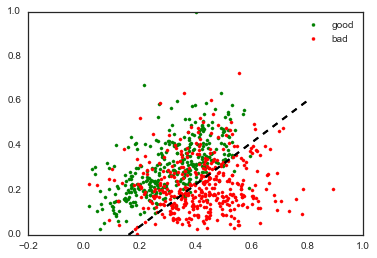

In [247]:
fig,ax=plt.subplots()
bins=np.linspace(0,2,100)
for sample,label,color in zip([good_sample,bad_sample],['good','bad'],['green','red']):
    ax.scatter(np.sqrt(np.square(sample['reco_CC1p_Pp_x'])+np.square(sample['reco_CC1p_Pp_y']))
               ,np.sqrt(np.square(sample['reco_CC1p_Pmu_x'])+np.square(sample['reco_CC1p_Pmu_y']))
               ,label=label,color=color,s=10)
    x_array,y_array=[0.16,0.8],[0.,0.6]
    slope,intercept = find_a_straight_line(x_array,y_array)
    plt.plot(x_array,y_array,'--',color='black',linewidth=2)
print "bad events: "
print "reco_CC1p_Pmu.Pt() < %f * reco_CC1p_Pp.Pt() + %f"%(slope,intercept)
print "np.sqrt(np.square(sample['reco_CC1p_Pmu_x'])+np.square(sample['reco_CC1p_Pmu_y'])) < %f * np.sqrt(np.square(sample['reco_CC1p_Pp_x'])+np.square(sample['reco_CC1p_Pp_y'])) + %f"%(slope,intercept)

ax.legend()
ax.set_ylim(0,1)

In [266]:
sample = GENIECC1p_in_FV_close_proximity
detected_good_sample = sample[np.sqrt(np.square(sample['reco_CC1p_Pmu_x'])+np.square(sample['reco_CC1p_Pmu_y'])) 
                             > 0.937500 * np.sqrt(np.square(sample['reco_CC1p_Pp_x'])+np.square(sample['reco_CC1p_Pp_y'])) 
                             -0.150000 ]
detected_bad_sample = sample[np.sqrt(np.square(sample['reco_CC1p_Pmu_x'])+np.square(sample['reco_CC1p_Pmu_y'])) 
                             < 0.937500 * np.sqrt(np.square(sample['reco_CC1p_Pp_x'])+np.square(sample['reco_CC1p_Pp_y'])) 
                             -0.150000 ]

reco_CC1p_Pmu_corrected = reco_CC1p_Pmu + (5.920809*power(reco_CC1p_Pmu_theta , -0.340039)+-0.858260) - (2.754095*power(reco_CC1p_Pmu_theta , -0.661217)+0.058811)


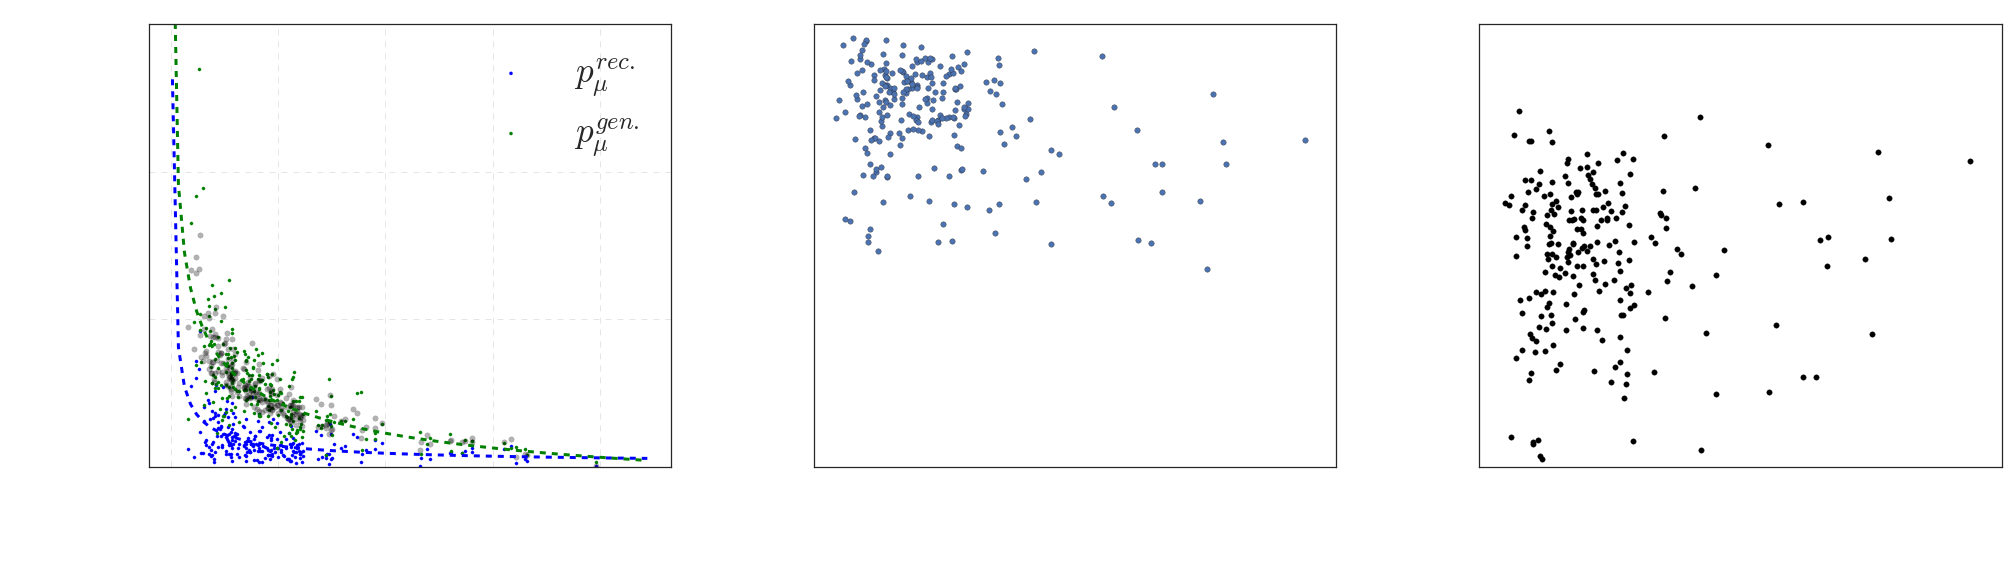

In [273]:
correct_momentum_from_theta(sample = detected_bad_sample
                            ,corr_type = 'y_reco + pow_func(x, *popt_true) - pow_func(x, *popt_reco)' #'pow_func(x, *popt_true)'
                            ,additional_sample=None)

(-1, 2.5)

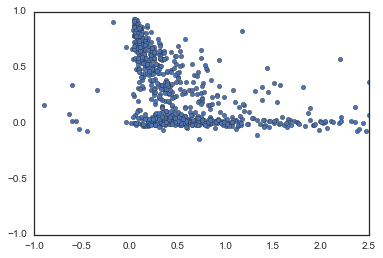

In [31]:
sample = GENIECC1p_in_FV_close_proximity
sample_1 = sample[(sample['reco_CC1p_Pmu_theta']<np.pi/2)&(sample['reco_CC1p_Pmu']<0.7)]
sample_2 = sample[(sample['reco_CC1p_Pmu_theta']<np.pi/2)&(sample['reco_CC1p_Pmu']>0.7)]
sample_3 = sample[(sample['reco_CC1p_Pmu_theta']>np.pi/2)&(sample['reco_CC1p_Pmu']>0.7)]
sample_4 = sample[(sample['reco_CC1p_Pmu_theta']>np.pi/2)&(sample['reco_CC1p_Pmu']<0.7)]

varx = 'Pmu_theta'
vary = 'Pmu'
fig,ax=plt.subplots()
xlim = (-1,2.5)
ax.scatter(sample['reco_CC1p_Xb'],(sample['truth_'+vary]-sample['reco_CC1p_'+vary])/sample['truth_'+vary])
ax.set_ylim(-1,1)
ax.set_xlim(xlim)
# for sample,color in zip([sample_1,sample_2,sample_3,sample_4],['red','blue','green','black']):
#     plt.hist((sample['truth_'+vary]-sample['reco_CC1p_'+vary])/sample['truth_'+vary],bins=np.linspace(-0.01,1,50),color=color,histtype='step',linewidth=3)

757
reco_CC1p_Pmu_corrected = (11.979473*power(reco_CC1p_Pmu_theta , -0.048784)+-9.235757)


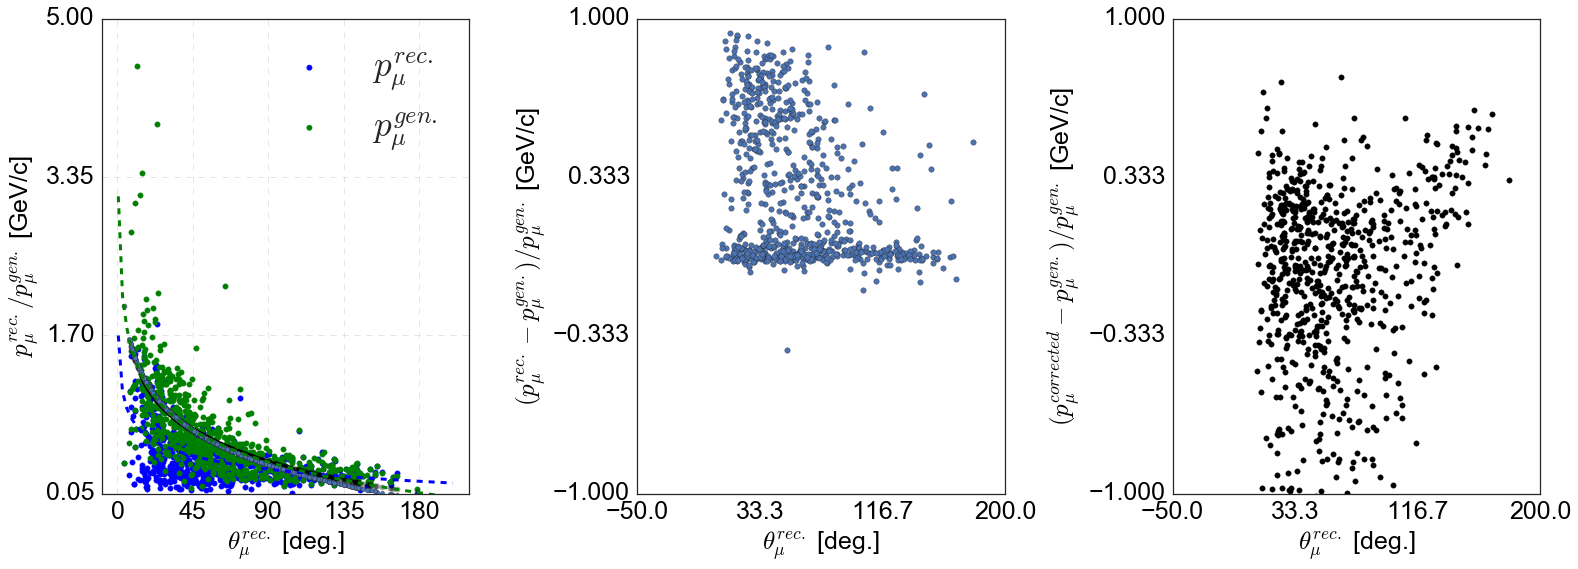

In [147]:
sample = GENIECC1p_in_FV_close_proximity

sample_notin_corridor = sample[(np.abs(sample['reco_CC1p_Pmu'] 
                                       - (11.979473*np.power(sample['reco_CC1p_Pmu_theta'] , -0.048784) -9.235757)) 
                                > 1.3)]
print len(sample_notin_corridor)
correct_momentum_from_theta(sample = sample_notin_corridor ,corr_type = 'pow_func(x, *popt_true)')

reco_CC1p_Pmu_corrected = reco_CC1p_Pmu + (2132.918305*power(reco_CC1p_Pmu_theta , -0.000275)+-2130.006223) - (-123.252663*power(reco_CC1p_Pmu_theta , -0.000144)+123.370531)


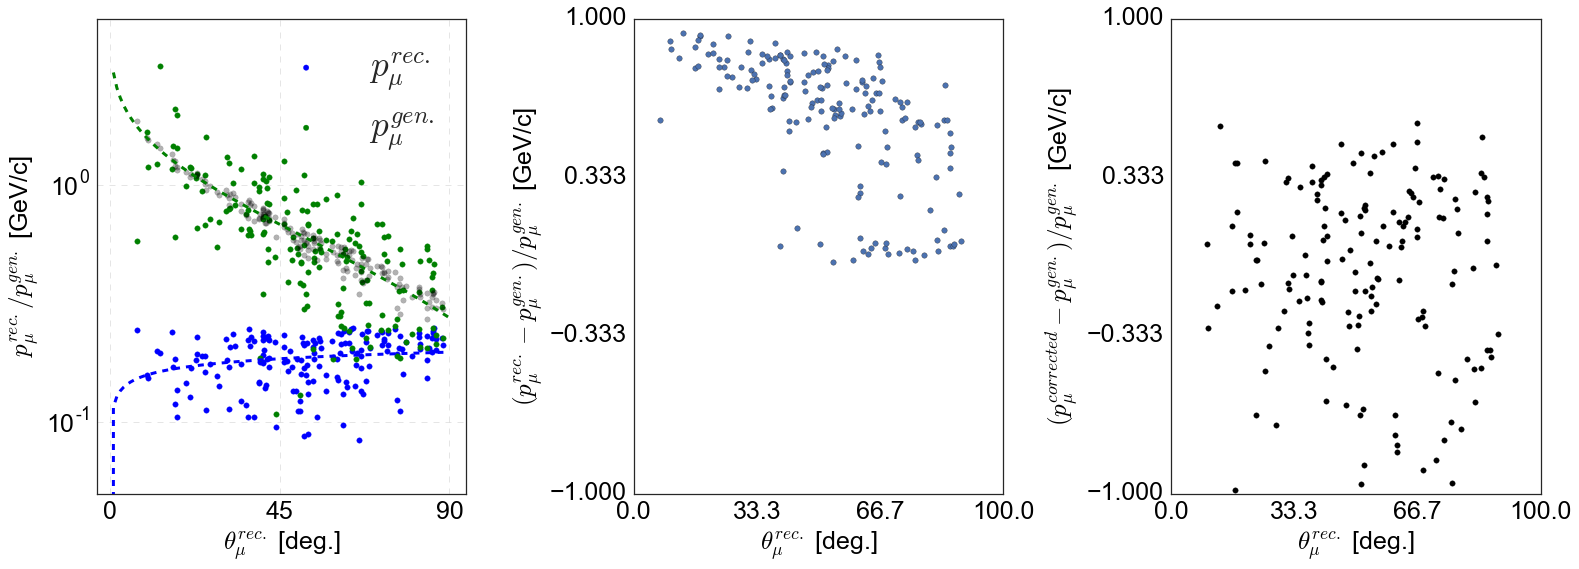

In [83]:
correct_momentum_from_theta(sample = MCC8_MCBNB_extBNBIsVertexReconstructed[(MCC8_MCBNB_extBNBIsVertexReconstructed['reco_CC1p_Pmu_theta']<np.pi/2)&(MCC8_MCBNB_extBNBIsVertexReconstructed['reco_CC1p_Pmu']<0.25)]
                            ,corr_type = 'y_reco + pow_func(x, *popt_true) - pow_func(x, *popt_reco)')

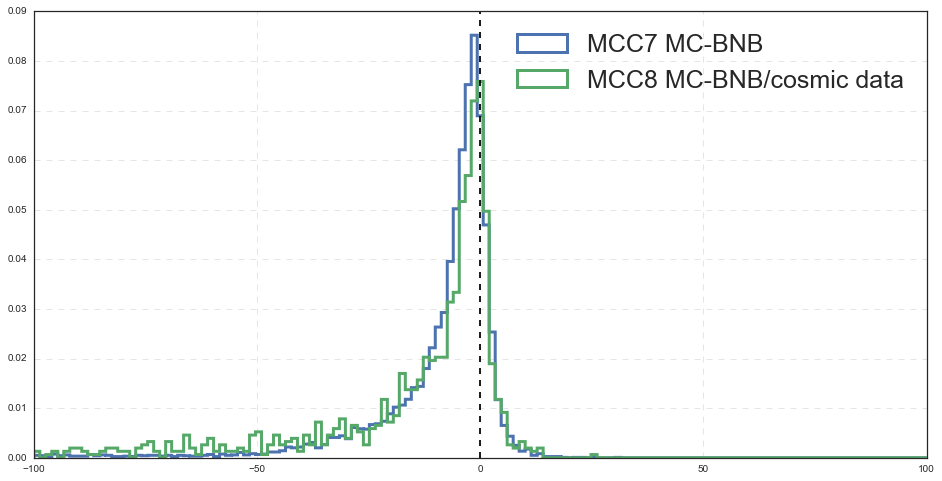

In [191]:
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-100,100,150)
for sample,label in zip([MCC7_MCBNBIsVertexReconstructed , MCC8_MCBNB_extBNBIsVertexReconstructed]
                        ,['MCC7 MC-BNB','MCC8 MC-BNB/cosmic data']):
    x = sample['truth_theta_pq'] - sample['reco_CC1p_theta_pq_fromE']
    ratio = 100*(sample['truth_theta_pq'] - sample['reco_CC1p_theta_pq_fromE'])/sample['truth_theta_pq']
    plt.hist( x , bins=bins, label=label, histtype='step',linewidth=3,normed=1);
ax.grid(linestyle='--',alpha=0.5)
ax.legend(loc='best',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')

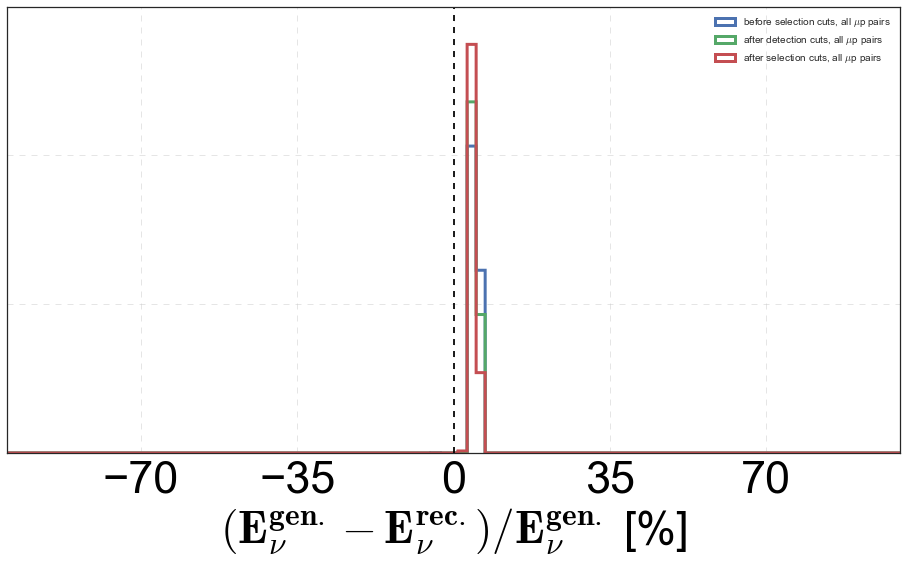

In [52]:
# before and after the cuts
# print np.min(sample['truth_Pmu'])
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-100,100,100)
mu_p_before_cuts =  pd.concat([reduced_samples['no cuts'][0],reduced_samples['no cuts'][1]])
mu_p_after_detection_cuts =  pd.concat([reduced_samples['cut 4'][0],reduced_samples['cut 4'][1]])
mu_p_after_cuts =  pd.concat([reduced_samples['cut 5'][0],reduced_samples['cut 5'][1]])
for sample,label in zip([ mu_p_before_cuts,mu_p_after_detection_cuts, mu_p_after_cuts ]
                        ,['before selection cuts, all $\\mu$p pairs','after detection cuts, all $\\mu$p pairs','after selection cuts, all $\\mu$p pairs']):
#     ratio = 100*(sample['truth_Ev'] - sample['reco_CC1p_Ev_fromE'])/sample['truth_Ev']
#     ratio = 100*(sample['truth_Ep'] - sample['reco_CC1p_Ep'])/sample['truth_Ep']
#     ratio = 100*(sample['truth_Pmu'] - sample['reco_CC1p_Pmu'])/sample['truth_Pmu']
    ratio = sample['truth_Pmu'] - sample['reco_CC1p_Pmu']

    plt.hist( ratio , bins=bins, label=label, histtype='step',linewidth=3,normed=1);
ax.grid(linestyle='--',alpha=0.5)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45,nticklabels=4)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
ax.legend()
ax.yaxis.set_major_formatter(ticker.NullFormatter())